In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler

### **Load Data**

In [3]:
# read every column except 'device_fraud_count' as its value is a constant 0
df = pd.read_csv('Base.csv', usecols=lambda x: x != 'device_fraud_count')

### **Hypothesis EDA**

1. employment_status, income, fraud_bool

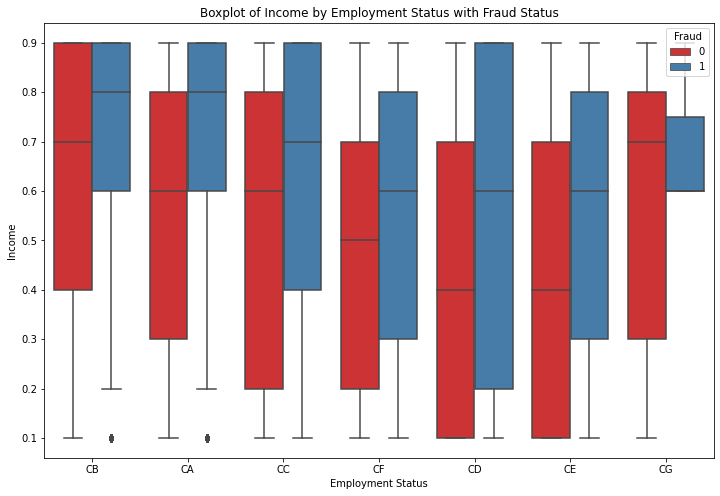

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x='employment_status', y='income', hue='fraud_bool', data=df, palette='Set1')
plt.title('Boxplot of Income by Employment Status with Fraud Status')
plt.xlabel('Employment Status')
plt.ylabel('Income')
plt.legend(title='Fraud', loc='upper right')
plt.show()


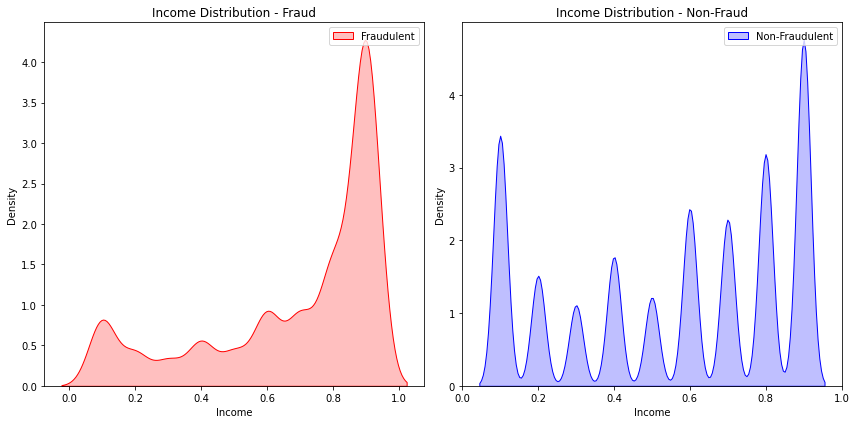

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plots
plt.figure(figsize=(12, 6))

# Plot for Fraudulent Income Distribution
plt.subplot(1, 2, 1)
sns.kdeplot(data=df[df['fraud_bool'] == 1]['income'], shade=True, color='red', label='Fraudulent')
plt.title('Income Distribution - Fraud')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()

# Plot for Non-Fraudulent Income Distribution
plt.subplot(1, 2, 2)
sns.kdeplot(data=df[df['fraud_bool'] == 0]['income'], shade=True, color='blue', label='Non-Fraudulent')
plt.title('Income Distribution - Non-Fraud')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/tanshereen/opt/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Users/tanshereen/opt/anaconda3/lib/python3.9/site-p

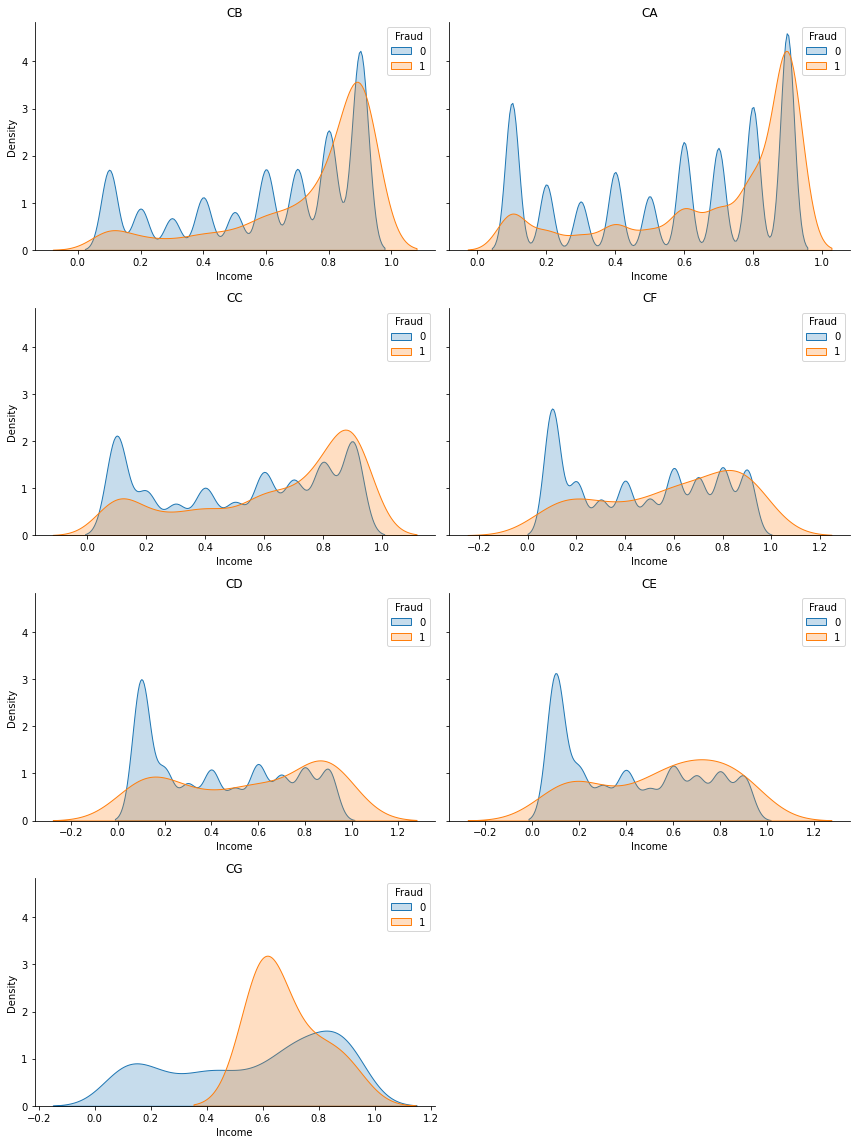

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the FacetGrid with sharex=False
g = sns.FacetGrid(df, col='employment_status', hue='fraud_bool', height=4, aspect=1.5, col_wrap=2, sharex=False)
g.map(sns.kdeplot, 'income', shade=True)
g.set_titles('Income Distribution - {col_name}')
g.set_xlabels('Income')
g.set_ylabels('Density')

# Adding x-axis label, y-axis label, and legend to each facet
for ax, title in zip(g.axes.flat, df['employment_status'].unique()):
    fraud_label = "Fraud" if df[df['employment_status'] == title]['fraud_bool'].iloc[0] == 1 else "Non-Fraud"
    ax.set_title(f'{title}')
    ax.set_xlabel('Income')
    ax.set_ylabel('Density')
    ax.legend(title='Fraud')

plt.tight_layout()
plt.show()


2. proposed_credit_limit, fraud_bool

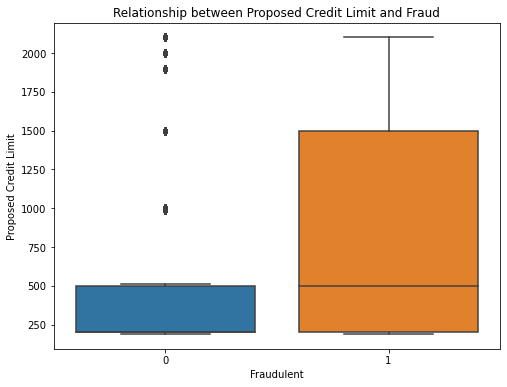

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x='fraud_bool', y='proposed_credit_limit', data=df)
plt.xlabel('Fraudulent')
plt.ylabel('Proposed Credit Limit')
plt.title('Relationship between Proposed Credit Limit and Fraud')
plt.show()


3. phone_home_valid & phone_mobile_valid

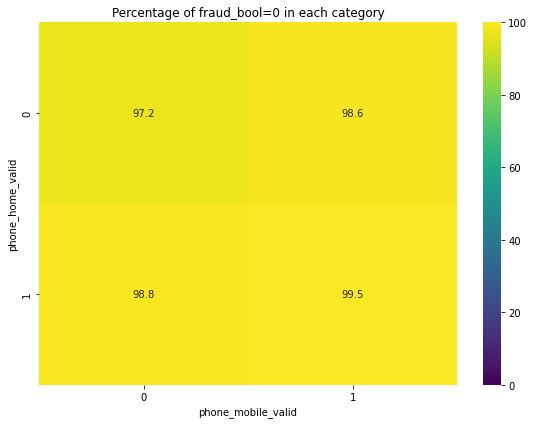

In [34]:
# Create a pivot table to calculate the percentage of fraud_bool=0 for each combination
pivot_table = df.pivot_table(index='phone_home_valid', columns='phone_mobile_valid', values='fraud_bool', aggfunc=lambda x: (x==0).mean() * 100)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='viridis', cbar=True, vmin=0, vmax=100)
plt.xlabel('phone_mobile_valid')
plt.ylabel('phone_home_valid')
plt.title('Percentage of fraud_bool=0 in each category')
plt.tight_layout()
plt.show()


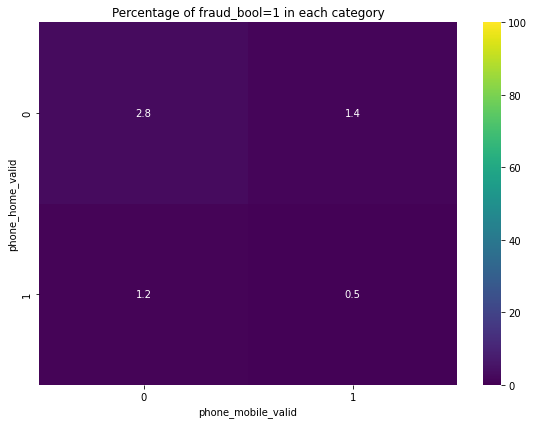

In [35]:
# Create a pivot table to calculate the percentage of fraud_bool=1 for each combination
pivot_table = df.pivot_table(index='phone_home_valid', columns='phone_mobile_valid', values='fraud_bool', aggfunc=lambda x: (x==1).mean() * 100)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='viridis', cbar=True, vmin=0, vmax=100)
plt.xlabel('phone_mobile_valid')
plt.ylabel('phone_home_valid')
plt.title('Percentage of fraud_bool=1 in each category')
plt.tight_layout()
plt.show()


In [10]:
df.groupby(['phone_home_valid', 'phone_mobile_valid', 'fraud_bool']).size().reset_index(name='count')

,phone_home_valid,phone_mobile_valid,fraud_bool,count
0,0,0,0,21613
1,0,0,1,619
2,0,1,0,553072
3,0,1,1,7619
4,1,0,0,87063
5,1,0,1,1029
6,1,1,0,327223
7,1,1,1,1762


In [20]:
# Calculate the total count for each group of phone_home_valid and phone_mobile_valid
total_counts = df.groupby(['phone_home_valid', 'phone_mobile_valid']).size().reset_index(name='total')


# Calculate the count of fraud_bool values for each combination
fraud_counts = df.groupby(['phone_home_valid', 'phone_mobile_valid', 'fraud_bool']).size().reset_index(name='count')

# Merge the fraud_counts and total_counts DataFrames
merged_df = pd.merge(fraud_counts, total_counts, on=['phone_home_valid', 'phone_mobile_valid'])

# Calculate the percentage of fraud_bool values for each combination
merged_df['percentage'] = (merged_df['count'] / merged_df['total']) * 100

merged_df

,phone_home_valid,phone_mobile_valid,fraud_bool,count,total,percentage
0,0,0,0,21613,22232,97.215725
1,0,0,1,619,22232,2.784275
2,0,1,0,553072,560691,98.641141
3,0,1,1,7619,560691,1.358859
4,1,0,0,87063,88092,98.831903
5,1,0,1,1029,88092,1.168097
6,1,1,0,327223,328985,99.464413
7,1,1,1,1762,328985,0.535587


In [31]:
fraud_bool1 = df[df['fraud_bool']==1]
fraud_bool0 = df[df['fraud_bool']==0]

fraud_bool1_phone = fraud_bool1.groupby(['phone_home_valid', 'phone_mobile_valid']).size().reset_index(name='count')
fraud_bool1_phone['percentage'] = (fraud_bool1_phone['count'] / len(fraud_bool1)) * 100

fraud_bool0_phone = fraud_bool0.groupby(['phone_home_valid', 'phone_mobile_valid']).size().reset_index(name='count')
fraud_bool0_phone['percentage'] = (fraud_bool0_phone['count'] / len(fraud_bool0)) * 100
print('fraud_bool = 0 :')
print(fraud_bool0_phone)
print('fraud_bool = 1 :')
print(fraud_bool1_phone)

fraud_bool = 0 :
   phone_home_valid  phone_mobile_valid   count  percentage
0                 0                   0   21613    2.185403
1                 0                   1  553072   55.923986
2                 1                   0   87063    8.803393
3                 1                   1  327223   33.087219
fraud_bool = 1 :
   phone_home_valid  phone_mobile_valid  count  percentage
0                 0                   0    619    5.612476
1                 0                   1   7619   69.081512
2                 1                   0   1029    9.329948
3                 1                   1   1762   15.976063


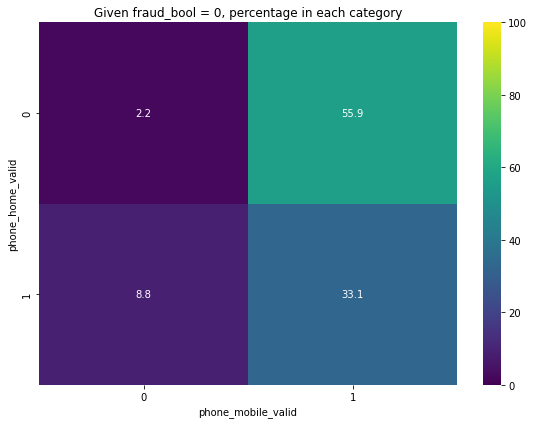

In [33]:
# Pivot the DataFrame to have 'phone_home_valid' as rows, 'phone_mobile_valid' as columns, and 'percentage' as values
pivot_table = fraud_bool0_phone.pivot(index='phone_home_valid', columns='phone_mobile_valid', values='percentage')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='viridis', cbar=True, vmin=0, vmax=100)
plt.xlabel('phone_mobile_valid')
plt.ylabel('phone_home_valid')
plt.title('Given fraud_bool = 0, percentage in each category')
plt.tight_layout()
plt.show()


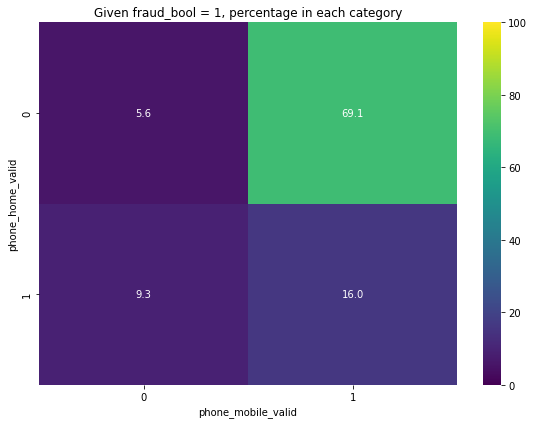

In [32]:
# Pivot the DataFrame to have 'phone_home_valid' as rows, 'phone_mobile_valid' as columns, and 'percentage' as values
pivot_table = fraud_bool1_phone.pivot(index='phone_home_valid', columns='phone_mobile_valid', values='percentage')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap='viridis', cbar=True, vmin=0, vmax=100)
plt.xlabel('phone_mobile_valid')
plt.ylabel('phone_home_valid')
plt.title('Given fraud_bool = 1, percentage in each category')
plt.tight_layout()
plt.show()


4. keep_alive_session, session_length_in_minutes, fraud_bool

In [12]:
tmp_df = df[["keep_alive_session","session_length_in_minutes","fraud_bool"]]


# Calculate Pearson correlation coefficient
correlation_coefficient = tmp_df['keep_alive_session'].corr(tmp_df['fraud_bool'])
print("Pearson's Correlation Coefficient btw keep_alive_session & fraud_bool:", correlation_coefficient) # no strong correlation

Pearson's Correlation Coefficient btw keep_alive_session & fraud_bool: -0.05029641281959549


<AxesSubplot:xlabel='fraud_bool', ylabel='session_length_in_minutes'>

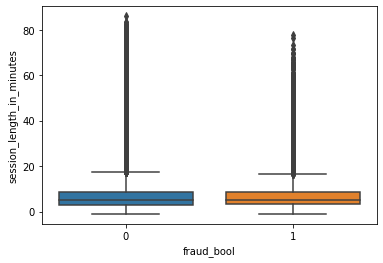

In [13]:
sns.boxplot(data=tmp_df, x='fraud_bool', y='session_length_in_minutes')

Text(0.5, 1.0, 'KDE Plot of Session Length by Fraud Status')

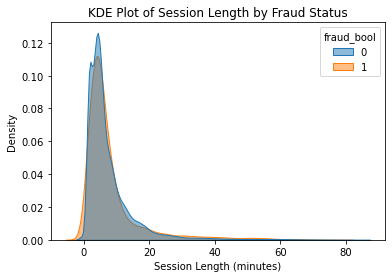

In [14]:
import matplotlib.pyplot as plt
# Create KDE plot
sns.kdeplot(data=tmp_df, x='session_length_in_minutes', hue='fraud_bool', fill=True, common_norm=False, alpha=0.5)

# Add labels and title
plt.xlabel('Session Length (minutes)')
plt.ylabel('Density')
plt.title('KDE Plot of Session Length by Fraud Status')


5. credit_risk_score, fraud_bool, name_email_similarity, email_is_free

In [15]:
# Calculate Pearson correlation coefficient
correlation_coefficient = df['credit_risk_score'].corr(df['fraud_bool'])
print("Pearson's Correlation Coefficient btw credit_risk_score & fraud_bool:", correlation_coefficient) # no strong correlation

# Calculate Pearson correlation coefficient
correlation_coefficient = df['credit_risk_score'].corr(df['income'])
print("Pearson's Correlation Coefficient btw credit_risk_score & income:", correlation_coefficient) # no strong correlation

# Calculate Pearson correlation coefficient
correlation_coefficient = df['email_is_free'].corr(df['name_email_similarity'])
print("Pearson's Correlation Coefficient btw email_is_free & name_email_similarity:", correlation_coefficient) # no strong correlation

Pearson's Correlation Coefficient btw credit_risk_score & fraud_bool: 0.0706236317961885
Pearson's Correlation Coefficient btw credit_risk_score & income: 0.17144745076872617
Pearson's Correlation Coefficient btw email_is_free & name_email_similarity: -0.06689734706977431


Text(0.5, 1.0, 'KDE Plot of credit_risk_score by Fraud Status')

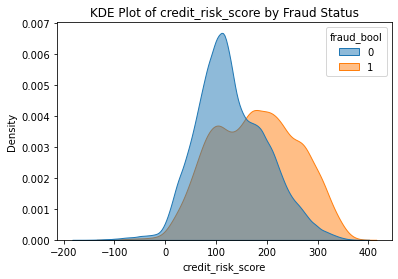

In [19]:
import matplotlib.pyplot as plt
# Create KDE plot
sns.kdeplot(data=df, x='credit_risk_score', hue='fraud_bool', fill=True, common_norm=False, alpha=0.5)

# Add labels and title
plt.xlabel('credit_risk_score')
plt.ylabel('Density')
plt.title('KDE Plot of credit_risk_score by Fraud Status')

<AxesSubplot:xlabel='fraud_bool', ylabel='credit_risk_score'>

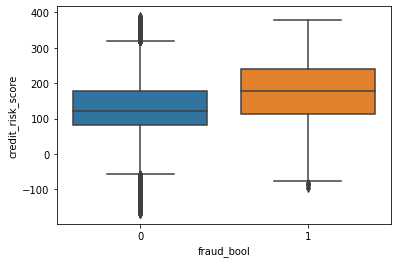

In [16]:
sns.boxplot(data=df, x='fraud_bool', y='credit_risk_score')

Text(0.5, 1.0, 'KDE Plot of name_email_similarity by Fraud Status')

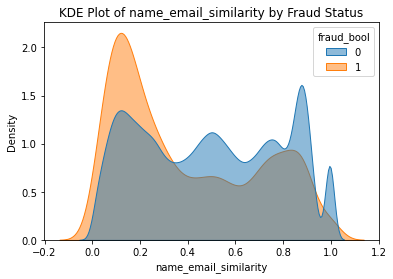

In [21]:
import matplotlib.pyplot as plt
# Create KDE plot
sns.kdeplot(data=df, x='name_email_similarity', hue='fraud_bool', fill=True, common_norm=False, alpha=0.5)

# Add labels and title
plt.xlabel('name_email_similarity')
plt.ylabel('Density')
plt.title('KDE Plot of name_email_similarity by Fraud Status')


<AxesSubplot:xlabel='fraud_bool', ylabel='name_email_similarity'>

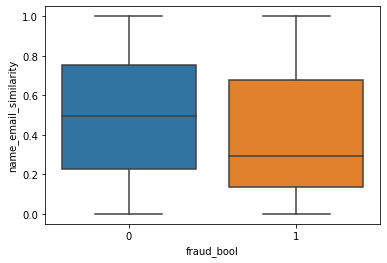

In [18]:
sns.boxplot(data=df, x='fraud_bool', y='name_email_similarity')

In [ ]:
# List possible scenarios as to why our hypothesis is not true in this 
# H0: There is a difference in credit_risk_score for fraud and non fraud case. H0 μfraud = μnonfraud
# H1: There is no differnce in credit_risk_score for fraud and non fraud case H1 μfraud != μnonfraud 

In [6]:
filtered_df_one = df[df['fraud_bool'] == 1]
filtered_df_one = np.array(filtered_df_one['credit_risk_score'])

In [7]:
filtered_df_zero = df[df['fraud_bool'] == 0]
filtered_df_zero = np.array(filtered_df_zero['credit_risk_score'])
num_samples = 11029
filtered_df_zero = np.random.choice(filtered_df_zero, size=num_samples, replace=False)

In [8]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(filtered_df_one, filtered_df_zero)
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. There is evidence to support the alternative hypothesis.")
else:
    print("Fail to reject the null hypothesis. There is not enough evidence to support the alternative hypothesis.")

t-statistic: 46.05812906013019
p-value: 0.0
Reject the null hypothesis. There is evidence to support the alternative hypothesis.
